# Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [3]:
from xgboost import XGBRFClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier

# Import DATA

In [4]:
Fun_NA = pd.read_csv('2021-outliner-edited.csv')
Fun_column = ['TotalAsset',	'TotalLiabilities',	'PaidupCap',	'Equity',	'Revenue',	'Expenses',	'EBITDA',	'EBIT',	'NetProfit',	'EPS',	'OperatingCashFlow',	'InvestingCashFlow',	'FinancingCashFlow',	'NetCashFlow',	'ReturnOnEquity',	'ReturnOnAsset',	'GrossProfitMargin',	'EBITMargin', 'DE',		'Int.Coverage',	'CurrentRatio',	'QuickRatio',	'FixedAssetTurnover',	'TotalAssetTurnover',	'InventoryTurnover',	'AverageSalePeriod',	'AccountsReceivableTurnover',	'AverageCollectionPeriod',	'AccountPayableTurnover',	'AveragePaymentPeriod',	'CashCycle']

In [5]:
Fun = Fun_NA.dropna()
X = Fun[Fun_column]
y = Fun.result

# Split Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [7]:
print(X_train.shape, X_test.shape)

(78, 31) (34, 31)


# Grid Search

For BaggingRF


In [8]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best parameters
randsearch = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
# Fit the random search object to the data
randsearch.fit(X_train, y_train)
best_params = randsearch.best_params_

c:\Users\P2021v2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
735 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\P2021v2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\P2021v2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\P2021v2\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

In [9]:
# แสดงค่าพารามิเตอร์ที่ดีที่สุดสำหรับ BaggingRFClassifier
print("Best Parameters for BaggingRFClassifier:", randsearch.best_params_)
print("Best Score for BaggingRFClassifier:", randsearch.best_score_)

Best Parameters for BaggingRFClassifier: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Score for BaggingRFClassifier: 0.8724999999999999


For XGRF

In [10]:
# สร้างโมเดล XGBRFClassifier
xgbrf_model = XGBRFClassifier()

# สร้างตัวแปรสำหรับการทดสอบค่าพารามิเตอร์ของ XGBRFClassifier
xgbrf_param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0], 
    'subsample':[0.9],
      'colsample_bynode':[0.2]
}

# ใช้ GridSearchCV สำหรับ XGBRFClassifier
xgbrf_grid_search = GridSearchCV(estimator=xgbrf_model, param_grid=xgbrf_param_grid)

# ทำการค้นหาค่าพารามิเตอร์ที่ดีที่สุดสำหรับ XGBRFClassifier
xgbrf_grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุดสำหรับ XGBRFClassifier
print("Best Parameters for XGBRFClassifier:", xgbrf_grid_search.best_params_)
print("Best Score for XGBRFClassifier:", xgbrf_grid_search.best_score_)

Best Parameters for XGBRFClassifier: {'colsample_bynode': 0.2, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 10, 'subsample': 0.9}
Best Score for XGBRFClassifier: 0.8466666666666667


# Bagging Random forest

In [11]:
RF_model = RandomForestClassifier(random_state=42,**best_params)
RF_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF_model.predict(X_test)
n_scores = cross_val_score(RF_model, X_train, y_train, scoring='accuracy', cv=5)
# report performance
print("CV_train : %4f" % n_scores.mean())
print("CV_test : %.4f" % RF_model.score(X_test,y_test))
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Best Model Accuracy: {accuracy:.2f}")

CV_train : 0.820000
CV_test : 0.9118
Best Model Accuracy: 91.18


In [12]:
print("All Hyperparameters and Their Values:")
for param, value in randsearch.best_params_.items():
    print(f"{param}= {value}")

All Hyperparameters and Their Values:
max_depth= 10
max_features= log2
min_samples_leaf= 4
min_samples_split= 5
n_estimators= 200


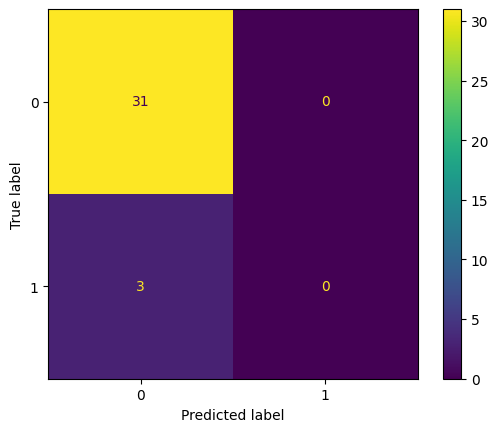

In [13]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Overfitting Bagging

In [14]:
print('Training Accuracy : ',
      metrics.accuracy_score(y_train, RF_model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test, RF_model.predict(X_test))*100)

Training Accuracy :  100.0
Validation Accuracy :  91.17647058823529


# XGboost

In [15]:
# define the model
model = XGBRFClassifier(n_estimators=10, learning_rate=0.01, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=42)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.846 (0.004)


In [16]:
# define the model
RF_XGmodel = XGBRFClassifier(n_estimators=10, subsample=0.9, colsample_bynode=0.2)
# fit the model on the whole dataset

RF_XGmodel.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.2,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=10, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [17]:
y_pred = RF_XGmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Best Model Accuracy: {accuracy:.2f}")

Best Model Accuracy: 97.06


In [18]:
XG_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print(XG_scores)
print(XG_scores.mean())
print(RF_XGmodel.score(X_test,y_test))

[0.875      0.8125     0.8125     0.86666667 0.86666667]
0.8466666666666667
0.9705882352941176


# Features selection

Bagging

In [ ]:
features_im = RF_model.feature_importances_
for feature_name, importance in zip(X.columns, features_im):
    print(f"Feature:  {feature_name}, Importnace: {importance}")

Feature:  TotalAsset, Importnace: 0.02133920199342203
Feature:  TotalLiabilities, Importnace: 0.020453810135415296
Feature:  PaidupCap, Importnace: 0.03087542076431479
Feature:  Equity, Importnace: 0.04564347273604315
Feature:  Revenue, Importnace: 0.011284801940338969
Feature:  Expenses, Importnace: 0.043050085842431696
Feature:  EBITDA, Importnace: 0.023443660354814256
Feature:  EBIT, Importnace: 0.06603969590447051
Feature:  NetProfit, Importnace: 0.15048847361510917
Feature:  EPS, Importnace: 0.08504633224275322
Feature:  OperatingCashFlow, Importnace: 0.0042473949579831935
Feature:  InvestingCashFlow, Importnace: 0.027426190044912185
Feature:  FinancingCashFlow, Importnace: 0.009109250979815162
Feature:  NetCashFlow, Importnace: 0.013357726303285342
Feature:  ReturnOnEquity, Importnace: 0.10120492020152871
Feature:  ReturnOnAsset, Importnace: 0.06879077042570404
Feature:  GrossProfitMargin, Importnace: 0.02673823135945447
Feature:  EBITMargin, Importnace: 0.02220505095078571
Featu

In [ ]:
features_im = RF_XGmodel.feature_importances_
for feature_name, importance in zip(X.columns, features_im):
    print(f"Feature:  {feature_name}, Importnace: {importance}")

Feature:  TotalAsset, Importnace: 0.0
Feature:  TotalLiabilities, Importnace: 0.0
Feature:  PaidupCap, Importnace: 0.06574876606464386
Feature:  Equity, Importnace: 0.04701142758131027
Feature:  Revenue, Importnace: 0.0
Feature:  Expenses, Importnace: 0.0
Feature:  EBITDA, Importnace: 0.045780718326568604
Feature:  EBIT, Importnace: 0.048704594373703
Feature:  NetProfit, Importnace: 0.073889821767807
Feature:  EPS, Importnace: 0.09211466461420059
Feature:  OperatingCashFlow, Importnace: 0.0
Feature:  InvestingCashFlow, Importnace: 0.056677836924791336
Feature:  FinancingCashFlow, Importnace: 0.0
Feature:  NetCashFlow, Importnace: 0.0
Feature:  ReturnOnEquity, Importnace: 0.11170288175344467
Feature:  ReturnOnAsset, Importnace: 0.10367279499769211
Feature:  GrossProfitMargin, Importnace: 0.06943055242300034
Feature:  EBITMargin, Importnace: 0.016264937818050385
Feature:  DE, Importnace: 0.0
Feature:  Int.Coverage, Importnace: 0.03942082077264786
Feature:  CurrentRatio, Importnace: 0.0
F

In [ ]:
# Make predictions on the test set
y_pred_XG = RF_XGmodel.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_XG)*100
print(f"Best Model Accuracy: {accuracy:.2f}")

Best Model Accuracy: 97.06


In [ ]:
print('Training Accuracy : ',
      metrics.accuracy_score(y_train, RF_XGmodel.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test, RF_XGmodel.predict(X_test))*100)

Training Accuracy :  97.43589743589743
Validation Accuracy :  97.05882352941177


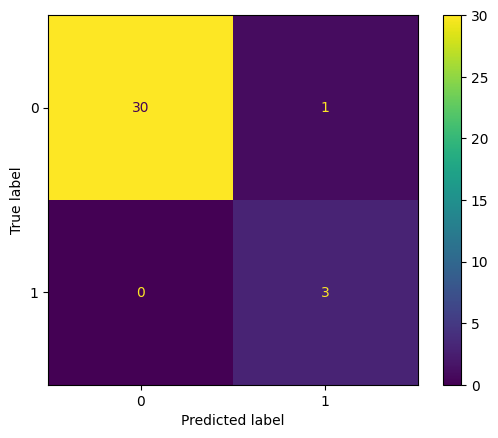

In [ ]:
cm = confusion_matrix(y_test, y_pred_XG)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Correlation

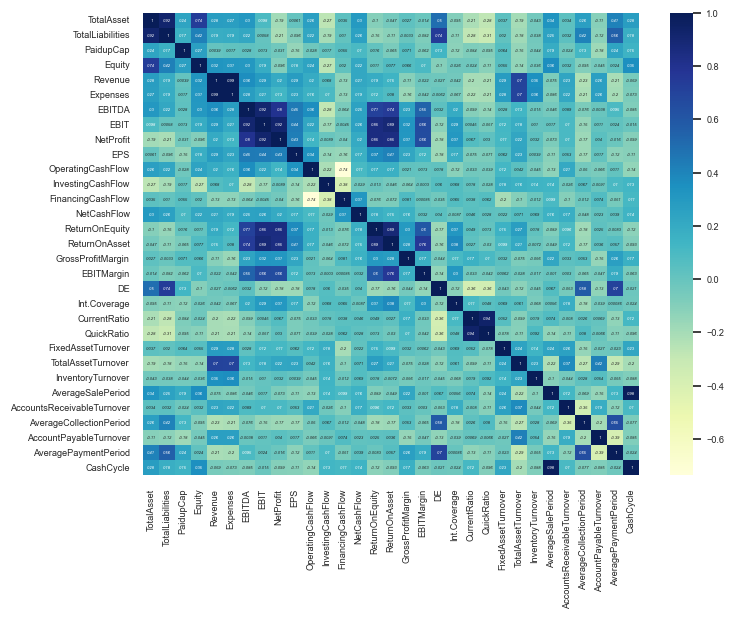

In [23]:
corr = X.corr()
plt.figure(figsize=(8, 6))

annot_kws = {
    "size": 3,  # ขนาดข้อความg
    "fontstyle": "italic"  # รูปแบบตัวอักษร
}
sns.set(font_scale=0.6)
sns.heatmap(corr, cmap="YlGnBu", annot=True, annot_kws=annot_kws)
plt.show()
# 


# Outliner

In [ ]:
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [ ]:
# คำนวณ Mahalanobis Distance ของแต่ละข้อมูล
robust_cov = MinCovDet().fit(X)
mahalanobis_distances = robust_cov.mahalanobis(X)

# กำหนดค่าสิ่งคาดหวังและค่าความไม่แน่นอนของ Mahalanobis Distance
threshold = chi2.ppf(0.975, df=X.shape[1])  # ใช้ alpha = 0.05

# ตรวจสอบ outliers
outliers = np.where(mahalanobis_distances > threshold)

# แสดงข้อมูลที่มี outliers
outlier_data = X.iloc[outliers[0]]
print("ข้อมูลที่มี outliers:")
print(outlier_data)

ข้อมูลที่มี outliers:
     TotalAsset  TotalLiabilities   PaidupCap      Equity      Revenue  \
0    1108436.85         281435.92   604692.31   809634.36    855936.48   
9    7899116.83        5891028.27   671632.22  2008074.60   1290045.93   
11   4118537.29        1696752.68   258958.39  2354705.23   2098995.96   
13    955393.48         564516.61   300000.00   390876.87    186507.08   
14    257788.44          44384.79   116500.00   213403.65    169221.18   
17   1103537.23         605415.65   170577.51   498121.58    495586.40   
18   1131991.76         325062.20    81562.36   806563.97    628834.37   
21   4022200.15        3428333.97   507000.00   678331.66    137163.72   
24   1807811.32         966671.39   200000.00   793488.53   2934145.08   
27   3902909.96         552961.14  1031660.15  3178715.99    924211.52   
31   6760268.15        4855897.88  1275027.88  1904370.27   2136673.87   
32   3221703.00        2340603.00   448877.00   881099.00    440670.00   
33   9898990.09 

# Backtest

In [ ]:
#เก็บค่า Predict ไว้ในตัวแปร
PreRFXG = RF_XGmodel.predict(X)

In [ ]:
PreRFXG

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
Re = Fun['Symbol']
Result2021 = pd.DataFrame(Re)
Result2021['result2021'] = PreRFXG

In [ ]:
Result2021.to_csv('Result2021XG.csv')